## 단일표본 t-검정 개요
- 목적 : 그룹의 평균이 기준 값과 차이가 있는지를 확인
  - 귀무가설 과 대립가설
  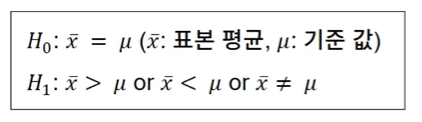
- 단일 표본 t-검정은 해당 변수가 정규 분포를 따라야 수행할 수 있으므로, **Komogorov-Smornov**나 **Shapiro-Wilk**를 사용한 정규성 검정이 선행되어야한다.
- 보통 샘플 수가 많을수록 정규성을 띌 가능성이 높아지므로, 샘플 수가 부족한 경우에만 정규성검정을 수행한 뒤, 정규성을 띄지 않는다 라고 판단된다면 비모수적 방법인 **부호 검정(sign test)**나 **윌콕슨 부호- 순위검정**을 수행해야 한다.

## 단일표본 t-검정 통계량
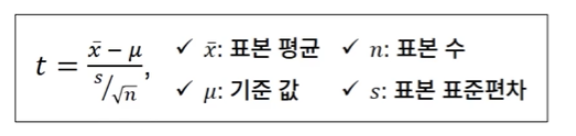

## 정규성 검정: Kolmogorov-Smornov
- Kolmogorov-Smornov 검정(이하 KS test)은 관측한 샘플들이 특정 분포를 따르는지 확인하기 위한 검정방법
- KS test는 특정 분포를 따른다면 나올 것이라 예상되는 값과 실제 값의 차이가 유의한지를 확인하는 방법으로, 해당 특정 분포를 정규 분포로 설정하여 정규성 검정에도 사용함

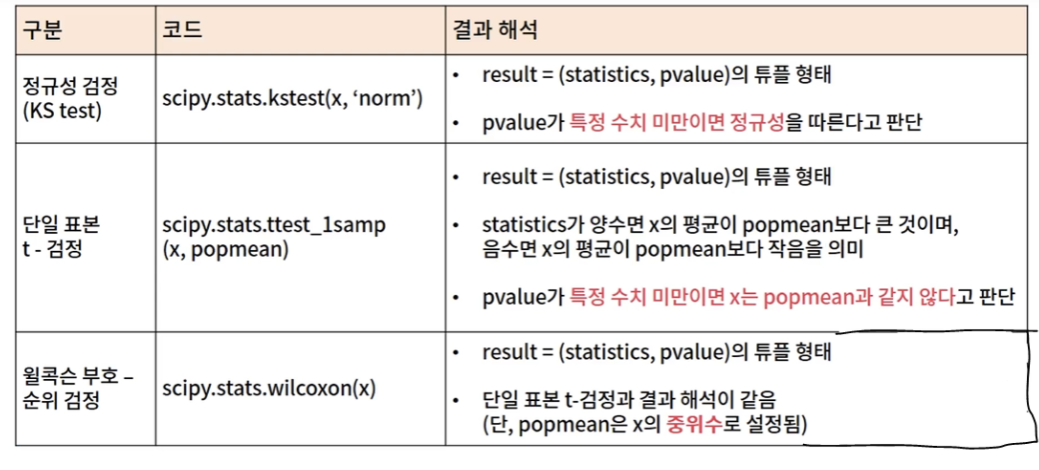

In [1]:
import os
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

with open('성인여성_키_데이터.txt', 'r') as f:
    data = f.read().split('\n')
    data = list(map(float,data))

In [3]:
data[:3]

[150.27, 142.94, 160.99]

In [4]:
# 정규성 검정
from scipy.stats import *
kstest(data, 'norm') # p-value가 0.0 < 0.05으로 정규성을 띈다고 볼 수 있음 

KstestResult(statistic=1.0, pvalue=0.0)

In [5]:
# 단일 표본 t 검정 수행
print(ttest_1samp(data,163))

# pvalue가 0.05 미만이므로 영가설 (data의 평균 == 163) 기각
# 통계량이 음수이므로 data이 평균 < 163임을 알 수 있음

Ttest_1sampResult(statistic=-2.979804412662668, pvalue=0.006510445335847954)


## 독립 표본 t 검정 개요
- 목적 : 서로 다른 두 그룹의 데이터 평균 비교
- 귀무가설과 대립가설
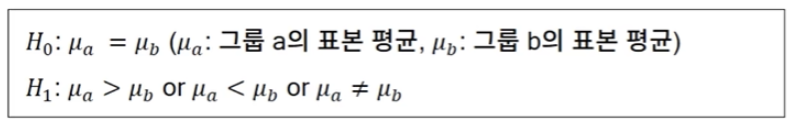

## 독립 표본 t-검정 선행 조건
- 독립성 : 두 그룹은 서로 독립적이어야 한다.
- 정규성 : 데이터는 정규분포를 따라야 한다.
  - 정규성을 따르지 않으면 비모수 검정인 Mann-Whitney 검정을 수행해야 한다.
- 등분산성 : 두 그룹의 데이터에 대한 분산이 같아야 한다.
  - Levene의 등분산 검정 : p-value가 0.05 미만이면 분산이 다르다고 판단
  - 분산이 같은지 다른지에 따라 사용하는 통계량이 달라지므로, 설정만 달리해주면 된다.

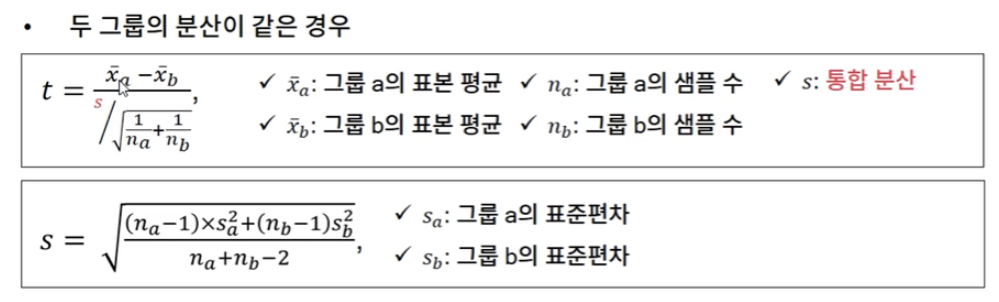

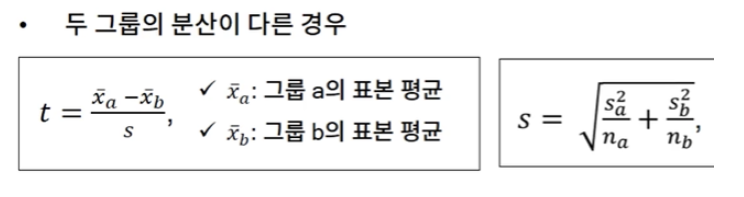

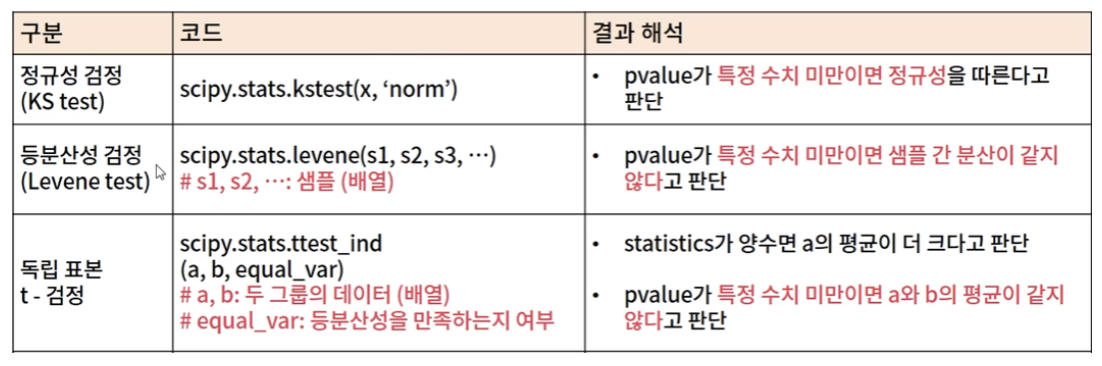

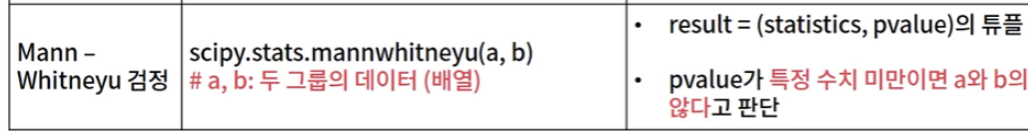

In [7]:
import pandas as pd
df1 = pd.read_csv("반별_점수_type1.csv", engine = "python")
df1.head()

,반,점수
0,A,73
1,A,69
2,A,71
3,A,71
4,A,73


In [8]:
group_A = df1['점수'].loc[df1['반'] == 'A'].values
group_B = df1['점수'].loc[df1['반'] == 'B'].values

print(group_A)
print(group_B)

[73 69 71 71 73 67 73 69 62 74 68 66 70 82 70 65 76 73 58 81]
[63 56 73 61 55 77 75 65 61 55]


In [9]:
# kstest를 이용한 정규성 검정: 모두 정규 분포를 띔을 확인
print(kstest(group_A, 'norm'))
print(kstest(group_B, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [10]:
# 등분산 검정
levene(group_A, group_B) # pvalue가 0.05 미만이 아니므로, 등분산을 띈다고 볼 수 있음

LeveneResult(statistic=2.033067087400979, pvalue=0.164964086222101)

In [12]:
import numpy as np
np.var(group_A, None, ddof=1)

32.26052631578948

In [13]:
# A와 B간에는 차이가 존재함을 확인 
print(ttest_ind(group_A, group_B, equal_var = True)) 

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)


#### Tip. 다른 포맷의 데이터 처리

In [14]:
df2 = pd.read_csv("반별_점수_type2.csv", engine = "python")
df2.head()

,A반,B반
0,73,63.0
1,69,56.0
2,71,73.0
3,71,61.0
4,73,55.0


In [15]:
# 길이가 달라서 결측이 발생할 수 있으므로, 결측을 제거한 뒤 각 컬럼을 group_A와 group_B에 저장
group_A = df2['A반'].dropna().values
group_B = df2['B반'].dropna().values

In [16]:
group_A

array([73, 69, 71, 71, 73, 67, 73, 69, 62, 74, 68, 66, 70, 82, 70, 65, 76,
       73, 58, 81], dtype=int64)

In [17]:
group_B

array([63., 56., 73., 61., 55., 77., 75., 65., 61., 55.])

In [18]:
# A와 B간에는 차이가 존재함을 확인 
print(ttest_ind(group_A, group_B, equal_var = True)) 

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)
